In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sb
sb.set()

In [13]:
raw_data=pd.read_csv('retailed_data.csv')
dataset=raw_data.copy()
dataset.head()

,order_id,customer_id,date,order_price,delivery_charges,coupon_discount,order_total,is_expedited_delivery,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22-06-2019,12200,79.89,10,11059.89,True,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29-12-2019,9080,62.71,0,9142.71,False,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID6197211592,02-03-2019,10670,65.87,10,9668.87,False,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12-01-2019,24800,57.61,15,21137.61,False,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28-11-2019,9145,75.54,25,6934.29,False,four stars good,True


In [14]:
dataset.isnull().sum()

order_id                  0
customer_id               0
date                      0
order_price               0
delivery_charges          0
coupon_discount           0
order_total               0
is_expedited_delivery     0
latest_customer_review    0
is_happy_customer         0
dtype: int64

In [15]:
dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
today=dt.datetime(2020,1,1)
rfm_data=dataset.groupby('customer_id').agg({'order_total':lambda x: x.sum(),
                                           'date':lambda x: (today-x.max()).days,
                                            'order_id':lambda x: len(x)})
rfm_data.head()

C:\Users\SUMAN\AppData\Local\Temp\ipykernel_9308\2173995840.py:1: UserWarning: Parsing '22-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
C:\Users\SUMAN\AppData\Local\Temp\ipykernel_9308\2173995840.py:1: UserWarning: Parsing '29-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
C:\Users\SUMAN\AppData\Local\Temp\ipykernel_9308\2173995840.py:1: UserWarning: Parsing '28-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
C:\Users\SUMAN\AppData\Local\Temp\ipykernel_9308\2173995840.py:1: UserWarning: Parsing '16-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=Tr

,order_total,date,order_id
customer_id,,,
ID0030385486,15585.36,108,1
ID0030385740,14145.50,300,1
ID0030946633,13195.69,263,2
ID0036822341,3912.99,253,1
ID0036825302,2152.60,296,1


In [16]:
rename=['monetary', 'recency', 'frequency']
rfm_data.columns=rename
rfm_data.head()

,monetary,recency,frequency
customer_id,,,
ID0030385486,15585.36,108,1
ID0030385740,14145.50,300,1
ID0030946633,13195.69,263,2
ID0036822341,3912.99,253,1
ID0036825302,2152.60,296,1


In [17]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler=StandardScaler()
scaler.fit(rfm_data)
scaled_data=scaler.transform(rfm_data)
scaled_rfm=pd.DataFrame(scaled_data,columns=['monetary','recency','frequency'])
scaled_rfm.head()
#print(rfm_data['monetary'].max())

,monetary,recency,frequency
0,-0.165452,-0.670604,-0.193379
1,-0.177077,1.126793,-0.193379
2,-0.184746,0.780419,0.461396
3,-0.259695,0.686805,-0.193379
4,-0.273908,1.089347,-0.193379


D:\Anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


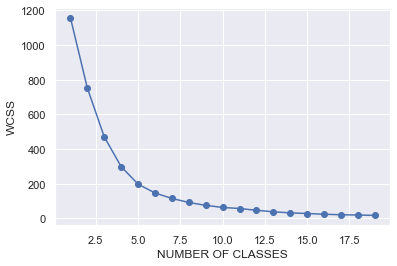

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    kmeans=KMeans(i)
    kmeans.fit(scaled_rfm)
    wcss.append(kmeans.inertia_)
clus_no=range(1,20)
plt.scatter(clus_no,wcss)
plt.plot(clus_no,wcss)
plt.xlabel('NUMBER OF CLASSES')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans=KMeans(5)
kmeans.fit(scaled_data)
rfm_data['Clusters']=kmeans.fit_predict(scaled_rfm)
rfm_data.head()

,monetary,recency,frequency,Clusters
customer_id,,,,
ID0030385486,15585.36,108,1,0
ID0030385740,14145.50,300,1,3
ID0030946633,13195.69,263,2,3
ID0036822341,3912.99,253,1,3
ID0036825302,2152.60,296,1,3


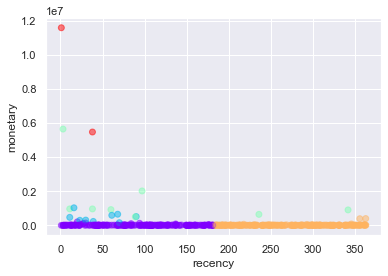

In [20]:
plt.scatter(rfm_data['recency'],rfm_data['monetary']*rfm_data['frequency'],c=rfm_data['Clusters'],cmap='rainbow',alpha=0.5)
plt.xlabel('recency')
plt.ylabel('monetary')
plt.show()

In [10]:
rfm_data.groupby('Clusters').mean()

,monetary,recency,frequency
Clusters,,,
0,17267.121958,273.238095,1.037037
1,14793.738708,91.988764,1.095506
2,788420.565000,109.500000,2.125000
3,543841.720000,19.500000,17.500000
4,70442.748889,45.333333,6.333333


In [11]:
rfm_data['Clusters']=rfm_data['Clusters'].map({0:'Need Attention',1:'promising customer',2:'Potential Customer',3:'Loyal Customer',4:'Champions'})
rfm_data.head()

,monetary,recency,frequency,Clusters
customer_id,,,,
ID0030385486,15585.36,108,1,promising customer
ID0030385740,14145.50,300,1,Need Attention
ID0030946633,13195.69,263,2,Need Attention
ID0036822341,3912.99,253,1,Need Attention
ID0036825302,2152.60,296,1,Need Attention
